# Canonical Signal

In [1]:
from PlantReactivityAnalysis.data.signal_dataset import SignalDataset
from PlantReactivityAnalysis.features.features_dataset import FeaturesDataset
import PlantReactivityAnalysis.data.preparation_eurythmy_data as ped
import PlantReactivityAnalysis.visualization.visualize as vis
from PlantReactivityAnalysis.config import FIGURES_DIR, FEATURES_ONE_SEC_DIR, INTERIM_DATA_DIR

In [2]:
def get_class_indices(input_list):
    class_indices = {}
    for idx, value in enumerate(input_list):
        if value not in class_indices:
            class_indices[value] = []
        class_indices[value].append(idx)
    return class_indices

## Data Import

In [3]:
norm_1s_signal_dataset_path = INTERIM_DATA_DIR / "norm_1s_signal_dataset.pkl"
signal_dataset = SignalDataset.load(file_path= norm_1s_signal_dataset_path)

feat_path= FEATURES_ONE_SEC_DIR / "features_dataset_norm_1s_ws0.1_hl0.1.pkl"
feat_dataset= FeaturesDataset.load(feat_path)

148682 signals have been loaded from C:\Users\alvar\Documents\GitHub\Plant-Reactivity-Analysis\data\interim\norm_1s_signal_dataset.pkl
Dataset loaded from C:\Users\alvar\Documents\GitHub\Plant-Reactivity-Analysis\data\processed\segmented_by_one_second\features_dataset_norm_1s_ws0.1_hl0.1.pkl. Shape: (148682, 188)


## Get Dataset

In [4]:
rows_drop = feat_dataset.objective_features[
            (feat_dataset.objective_features["flatness_ratio_1000"] > 0.75)
            & (feat_dataset.objective_features["flatness_ratio_500"] > 0.85)
            & (feat_dataset.objective_features["flatness_ratio_100"] > 0.999)
        ].index.to_list()

signal_dataset.remove_signals_by_index(rows_drop)

## Plant Signal

In [5]:
avg_signal= signal_dataset.average_signal(signal_dataset.features.index.tolist())

Figure saved to C:\Users\alvar\Documents\GitHub\Plant-Reactivity-Analysis\reports\figures\signal_avg.png


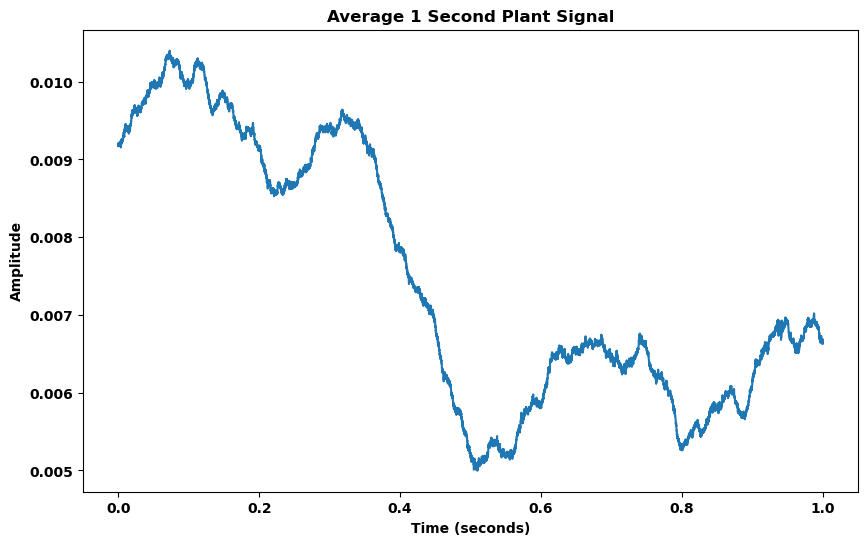

<Figure size 640x480 with 0 Axes>

In [6]:
vis.plot_multiple_waveforms(waveforms= [avg_signal], title='Average 1 Second Plant Signal',
                            save_path = FIGURES_DIR / "signal_avg.png", show_legend=False, figsize=(10, 6))

## RQ5

Figure saved to C:\Users\alvar\Documents\GitHub\Plant-Reactivity-Analysis\reports\figures\rq5_signal_avg.png


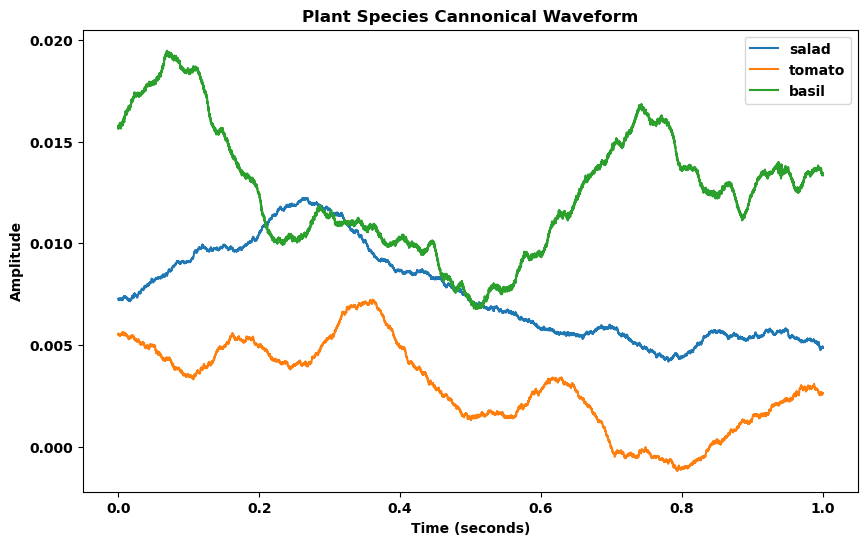

<Figure size 640x480 with 0 Axes>

In [8]:
#### rq5_signal_dataset= signal_dataset.copy()
rq5_indexes, rq5_targets= ped.get_indexes_and_targets_by_rq(5, rq5_signal_dataset.features)
rq5_signal_dataset.features= rq5_signal_dataset.features.iloc[rq5_indexes]
rq5_signal_dataset.features.reset_index(drop=True, inplace=True)

rq5_classes_indices= get_class_indices(rq5_targets)
avg_1= signal_dataset.average_signal(rq5_classes_indices[0])
avg_2= signal_dataset.average_signal(rq5_classes_indices[1])
avg_3= signal_dataset.average_signal(rq5_classes_indices[2])

vis.plot_multiple_waveforms(waveforms= [avg_1, avg_2, avg_3], labels=['salad','tomato','basil'], title='Plant Species Cannonical Waveform',
                            save_path = FIGURES_DIR / "rq5_signal_avg.png", figsize=(10, 6))